# Task 2: Temporal Analysis of the Results

#### Libraries and Imports

In [7]:
!pip install imageio
!pip install imageio-ffmpeg

In [8]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  %cd /content/drive/MyDrive/M6_Project/week1

In [9]:
from VehicleDetection import VehicleDetection
from matplotlib import animation
from eval_utils import *
import numpy as np
import matplotlib.pyplot as plt
import imageio
import gc

data_path = '../datasets/AICity_data/train/S03/c010/'
video_path = '../datasets/AICity_data/train/S03/c010/vdo.avi'

#### Reading Data

In [10]:
def readDetections(path):
  with open(path) as f:
    lines = f.readlines()

  detections = {}
  for line in lines:
    data = line.split(',')
    if data[0] in detections:
      detections[data[0]].append(VehicleDetection(int(data[0]), int(data[1]), float(data[2]), float(data[3]), float(data[4]), float(data[5]), float(data[6])))
    else:
      detections[data[0]] = [VehicleDetection(int(data[0]), int(data[1]), float(data[2]), float(data[3]), float(data[4]), float(data[5]), float(data[6]))]


  return detections

#### IoU vs Time Calculation and Plot

In [11]:
def iou_vs_time(data, gt):
    iou_time = {}
    # Iterate all frames
    for frame_num in gt.keys():
        # Get data from frame number: frame_num
        frames_gt = gt[frame_num]
        if frame_num in data:
          frames_data = data[frame_num]

          scores = []

          # Compare GT VehicleDetection to the Predicted
          for frame_gt in frames_gt:
              for frame_data in frames_data:
                  # Double for because some frames_data contains +1 VehicleDetection
                  iou = frame_gt.IoU(frame_data)
                  scores.append(iou)

          iou_time[frame_num] = max(scores) # Best IoU between gt and predicted for that frame
    
    return iou_time

In [12]:
def plot_temporal_analysis(data, title):
    # Frame IoU Split
    lists = sorted(data.items())
    x, y = zip(*lists)
    x = [int(a) for a in x]

    # Sort by frame 
    x_sort = sorted(x)
    y_sort = [y[x.index(i)] for i in x_sort]
    x = x_sort
    y = y_sort
    
    # Ploting Result
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.xlabel("Frame #")
    plt.ylabel("IoU")
    plt.plot(x, y)
    plt.ylim(0.0,1.01)
    ticks = np.arange(int(x[0]), int(x[-1]), step = 100)
    plt.xticks(ticks)
    plt.show()

#### Results

In [14]:
gt_detect = readDetections(data_path + 'gt/gt.txt')
yolo3_dect = readDetections(data_path + 'det/det_yolo3.txt')
ssd512_dect = readDetections(data_path + 'det/det_ssd512.txt')
rcnn_dect = readDetections(data_path + 'det/det_mask_rcnn.txt')

In [15]:
gt_vs_time = iou_vs_time(gt_detect, gt_detect)
yolo3_vs_time = iou_vs_time(yolo3_dect, gt_detect)
ssd512_vs_time = iou_vs_time(ssd512_dect, gt_detect)
rcnn_vs_time = iou_vs_time(rcnn_dect, gt_detect)

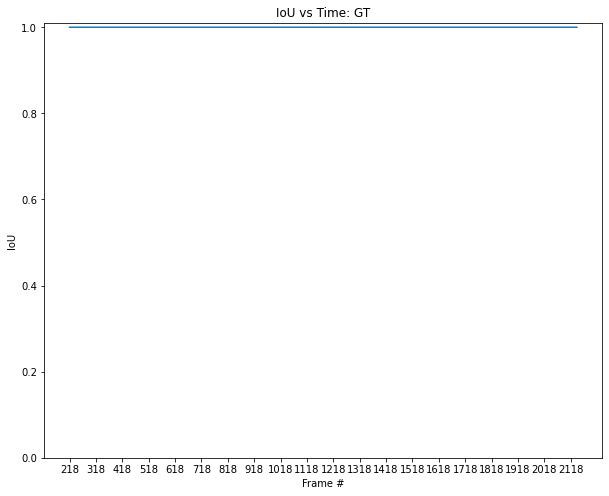

In [16]:
plot_temporal_analysis(gt_vs_time, "IoU vs Time: GT")

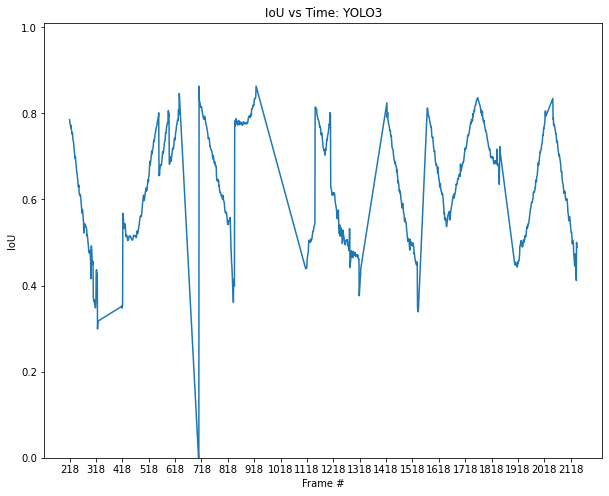

In [17]:
plot_temporal_analysis(yolo3_vs_time, "IoU vs Time: YOLO3")

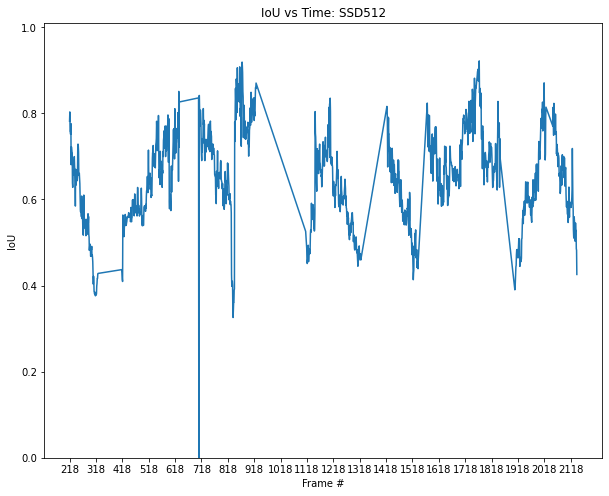

In [18]:
plot_temporal_analysis(ssd512_vs_time, "IoU vs Time: SSD512")

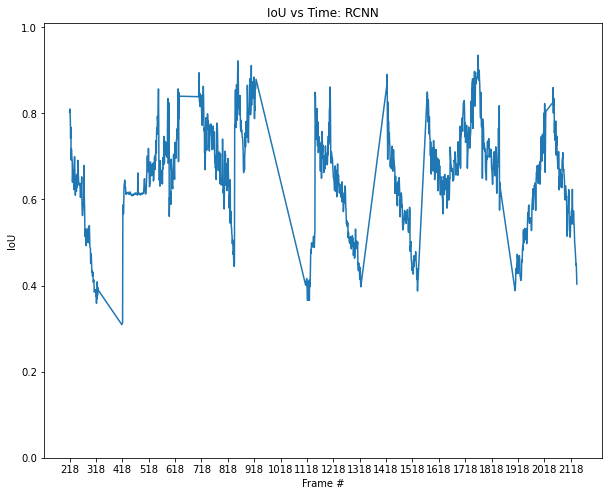

In [19]:
plot_temporal_analysis(rcnn_vs_time, "IoU vs Time: RCNN")

#### Video Results

In [ ]:
%matplotlib nbagg
data = gt_vs_time
title = "GT vs Time"
# Video
vid = imageio.get_reader(video_path,  'ffmpeg')
# IoU per Frame
lists = sorted(data.items())
# X is frames Y is IoU
x, y = zip(*lists)
x = [int(a) for a in x]

# Sort by frame 
x_sort = sorted(x)
y_sort = [y[x.index(i)] for i in x_sort]
x = x_sort
y = y_sort

# Plot Structure
fig, ax = plt.subplots(2)
fig.suptitle(title)
ax[1].set_xlim((x[0], x[-1]))
ax[1].set_ylim((0, 1.1))
x_data, y_data = [],[]
line, = ax[1].plot(x_data,y_data, lw=1.3)


# X,Y generators for plotting
def data_gen():
    cnt = -50
    stop = False
    while cnt < len(x) - 1 and not stop:
        try:
            cnt += 50
            yield x[:cnt], y[:cnt], vid.get_data(x[cnt])
        except:
            stop = True
            

# Update
def update(data):
    # New Values
    x_data, y_data, video_frame = data
    # Update Values
    line.set_data(x_data, y_data)
    ax[0].imshow(video_frame)
    plt.pause(0.0001)
    return line,

anim = animation.FuncAnimation(fig, update, data_gen, interval = 50, blit = True, repeat = True)
anim.save("gt_vs_time.gif", writer=animation.PillowWriter(fps=12))
plt.show()
gc.collect()


In [ ]:
%matplotlib nbagg
data = yolo3_vs_time
title = "YOLO3 vs Time"
# Video
vid = imageio.get_reader(video_path,  'ffmpeg')
# IoU per Frame
lists = sorted(data.items())
# X is frames Y is IoU
x, y = zip(*lists)
x = [int(a) for a in x]

# Sort by frame 
x_sort = sorted(x)
y_sort = [y[x.index(i)] for i in x_sort]
x = x_sort
y = y_sort

# Plot Structure
fig, ax = plt.subplots(2)
fig.suptitle(title)
ax[1].set_xlim((x[0], x[-1]))
ax[1].set_ylim((0, 1.1))
x_data, y_data = [],[]
line, = ax[1].plot(x_data,y_data, lw=1.3)


# X,Y generators for plotting
def data_gen():
    cnt = -50
    stop = False
    while cnt < len(x) - 1 and not stop:
        try:
            cnt += 50
            yield x[:cnt], y[:cnt], vid.get_data(x[cnt])
        except:
            stop = True
            

# Update
def update(data):
    # New Values
    x_data, y_data, video_frame = data
    # Update Values
    line.set_data(x_data, y_data)
    ax[0].imshow(video_frame)
    plt.pause(0.0001)
    return line,

anim = animation.FuncAnimation(fig, update, data_gen, interval = 50, blit = True, repeat = True)
anim.save("yolo3_vs_time.gif", writer=animation.PillowWriter(fps=12))
plt.show()
gc.collect()


In [ ]:
%matplotlib nbagg
data = ssd512_vs_time
title = "SSD512 vs Time"
# Video
vid = imageio.get_reader(video_path,  'ffmpeg')
# IoU per Frame
lists = sorted(data.items())
# X is frames Y is IoU
x, y = zip(*lists)
x = [int(a) for a in x]

# Sort by frame 
x_sort = sorted(x)
y_sort = [y[x.index(i)] for i in x_sort]
x = x_sort
y = y_sort

# Plot Structure
fig, ax = plt.subplots(2)
fig.suptitle(title)
ax[1].set_xlim((x[0], x[-1]))
ax[1].set_ylim((0, 1.1))
x_data, y_data = [],[]
line, = ax[1].plot(x_data,y_data, lw=1.3)


# X,Y generators for plotting
def data_gen():
    cnt = -50
    stop = False
    while cnt < len(x) - 1 and not stop:
        try:
            cnt += 50
            yield x[:cnt], y[:cnt], vid.get_data(x[cnt])
        except:
            stop = True
            

# Update
def update(data):
    # New Values
    x_data, y_data, video_frame = data
    # Update Values
    line.set_data(x_data, y_data)
    ax[0].imshow(video_frame)
    plt.pause(0.0001)
    return line,

anim = animation.FuncAnimation(fig, update, data_gen, interval = 50, blit = True, repeat = True)
anim.save("ssd512_vs_time.gif", writer=animation.PillowWriter(fps=12))
plt.show()
gc.collect()


In [ ]:
%matplotlib nbagg
data = rcnn_vs_time
title = "R-CNN vs Time"
# Video
vid = imageio.get_reader(video_path,  'ffmpeg')
# IoU per Frame
lists = sorted(data.items())
# X is frames Y is IoU
x, y = zip(*lists)
x = [int(a) for a in x]

# Sort by frame 
x_sort = sorted(x)
y_sort = [y[x.index(i)] for i in x_sort]
x = x_sort
y = y_sort

# Plot Structure
fig, ax = plt.subplots(2)
fig.suptitle(title)
ax[1].set_xlim((x[0], x[-1]))
ax[1].set_ylim((0, 1.1))
x_data, y_data = [],[]
line, = ax[1].plot(x_data,y_data, lw=1.3)


# X,Y generators for plotting
def data_gen():
    cnt = -50
    stop = False
    while cnt < len(x) - 1 and not stop:
        try:
            cnt += 50
            yield x[:cnt], y[:cnt], vid.get_data(x[cnt])
        except:
            stop = True
            

# Update
def update(data):
    # New Values
    x_data, y_data, video_frame = data
    # Update Values
    line.set_data(x_data, y_data)
    ax[0].imshow(video_frame)
    plt.pause(0.0001)
    return line,

anim = animation.FuncAnimation(fig, update, data_gen, interval = 50, blit = True, repeat = True)
anim.save("rcnn_vs_time.gif", writer=animation.PillowWriter(fps=12))
plt.show()
gc.collect()
